## Clustering : Scaled Data

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
#----------setting up the path for the importer
import sys
sys.path.append('../')

In [3]:
#----------importing the important reusable function from src folder
from src.process_data.data import load_data, save_data, get_nan, get_info, get_shape
from src.unsupervised_ml.pca import get_corr, pca_and_variance, reduce_dim
from src.unsupervised_ml.clustering import find_k, kmeans_clutsers, find_eps, db_clusters, sample_for_hm, plot_dendo, hm_clusters, plot_price_and_labels

## ------------ Clustering ----------------

In [4]:
#-------------setting up the data path
df_scaled_train_path = '../data/model_ready/scaled/train_scaled.csv'
df_scaled_test_path = '../data/model_ready/scaled/test_scaled.csv'
df_scaled_price_path = '../data/model_ready/scaled/price_scaled.csv'

##### ************ Train data **************

In [5]:
#--------------loading them one by one and performing initial checks
df_scaled_train = load_data(df_scaled_train_path)
df_scaled_train.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448


In [6]:
#------nan values
get_nan(df_scaled_train)

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [7]:
### veryfying the shape
get_shape(df_scaled_train)

(10683, 14)

In [8]:
#---------------finding the correlation between the features
get_corr(df_scaled_train)

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
Source,1.000000,1.000000,-0.599229,0.156271,-0.076331,-0.036383,-0.005165,-0.066328,-0.167061,0.035224,0.117531,-0.028373,0.148654,-0.438827
Destination,1.000000,1.000000,-0.599229,0.156271,-0.076331,-0.036383,-0.005165,-0.066328,-0.167061,0.035224,0.117531,-0.028373,0.148654,-0.438827
Total_Stops,-0.599229,-0.599229,1.000000,-0.304862,0.223627,-0.188354,0.024307,-0.008386,0.056309,-0.057593,-0.002617,0.036347,-0.106854,0.742598
Airline_IndiGo,0.156271,0.156271,-0.304862,1.000000,-0.366037,-0.306828,-0.256442,0.007322,-0.048515,-0.023367,-0.014763,-0.071459,0.035123,-0.349856
Airline_Jet Airways,-0.076331,-0.076331,0.223627,-0.366037,1.000000,-0.472109,0.498279,-0.017241,0.059716,0.113980,0.024376,-0.027332,-0.057698,0.313116
Airline_other,-0.036383,-0.036383,-0.188354,-0.306828,-0.472109,1.000000,-0.121509,0.038802,0.016525,-0.090298,0.024274,0.018699,-0.019540,-0.239882
Additional_Info_Some info,-0.005165,-0.005165,0.024307,-0.256442,0.498279,-0.121509,1.000000,0.036404,0.065390,0.048512,0.029454,-0.050649,-0.043024,0.117081
Date_of_Journey_day,-0.066328,-0.066328,-0.008386,0.007322,-0.017241,0.038802,0.036404,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.022439
Date_of_Journey_month,-0.167061,-0.167061,0.056309,-0.048515,0.059716,0.016525,0.065390,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.023277
Dep_Time_hour,0.035224,0.035224,-0.057593,-0.023367,0.113980,-0.090298,0.048512,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.009283


In [9]:
#-----------making the copy, and finding out the variance_ratio using the pca
df_scaled_train_copy = df_scaled_train.copy()
df_scaled_train_copy.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448


In [10]:
#------------------using the pca to get the explained variance ratio on copy data
pca_and_variance(df_scaled_train_copy)

array([0.6105259 , 0.10085026, 0.05851769, 0.05424039, 0.03369189,
       0.02678063, 0.02436893, 0.0232997 , 0.02158861, 0.01734143,
       0.01360765, 0.00865435, 0.00653257, 0.        ])

In [11]:
#-----------------using the pca to reduce the dimensionality n the original train data
df_scaled_train = reduce_dim(df_scaled_train)
df_scaled_train

array([[ 1.6431797 , -0.52896602],
       [-0.33207083,  0.44094472],
       [-1.77045694,  0.83142765],
       ...,
       [ 1.54163183,  0.2635904 ],
       [ 1.60166193, -0.70427046],
       [-1.6846525 ,  0.1749168 ]])

In [12]:
#--------------checking out the variance ratio of the reuduced data
pca_and_variance(df_scaled_train)

array([0.85823216, 0.14176784])

##### ============= Kmeans clustering ==================

[32844.392245596515, 11775.716147498757, 7963.534718315306, 6528.570490620331, 4351.407605646196, 2322.460782828848, 1425.0749970054076, 960.3565663848933, 886.9329517823314, 687.5129927350207, 646.6106714353734]


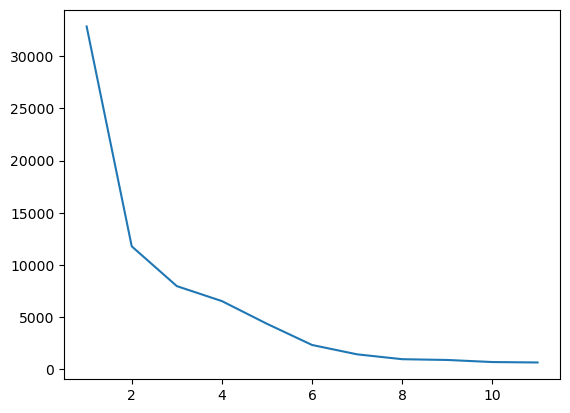

In [13]:
#---------finding the value of the k
find_k(df_scaled_train)

In [14]:
#----------setting up the labels path
y_labels_kmeans_path = '../../labels/scaled/scaled_kmeans_labels.npy'
y_labels_kmeans_path

'../../labels/scaled/scaled_kmeans_labels.npy'

0.6004808910560693


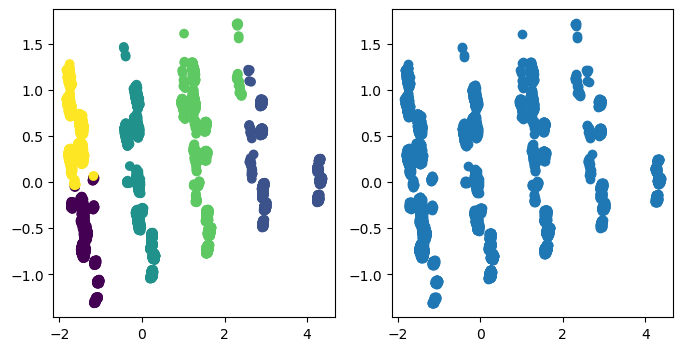

In [15]:
#-----------taking k = 5
kmeans_clutsers(df_scaled_train, k = 5, labels_path = y_labels_kmeans_path)

##### ================= DB scan clustering ===================

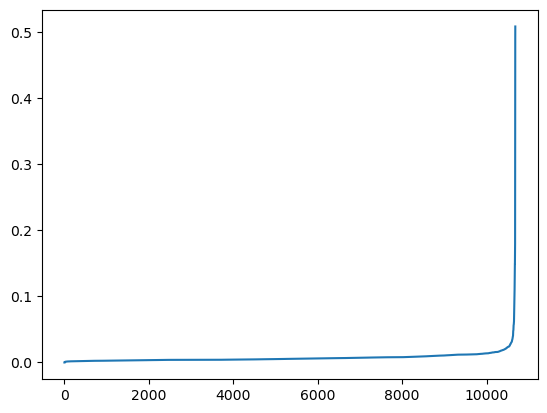

In [16]:
#---------------finding the value of eps
find_eps(df_scaled_train)

In [17]:
#----------setting up the labels path
y_labels_db_path = '../../labels/scaled/scaled_db_labels.npy'
y_labels_db_path

'../../labels/scaled/scaled_db_labels.npy'

0.6649678071560698


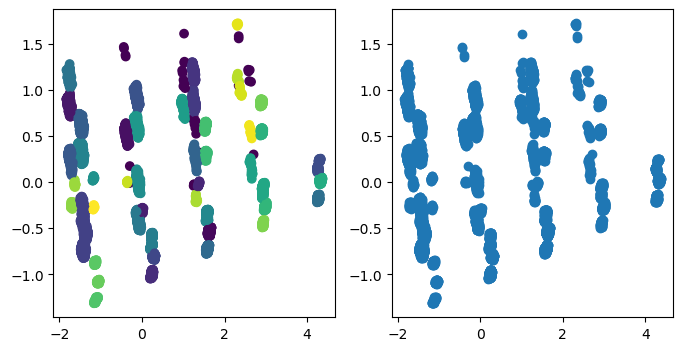

In [18]:
#-------------from the graph taking 0.045
db_clusters(df_scaled_train, eps = 0.045, labels_path = y_labels_db_path)

##### ================ HM clustering ====================

In [19]:
### For the hm clustering I will take the sample of 3000 records from the df_scaled_train
### it's because of lack of the resources

In [20]:
# -------------taking the sample
df_scaled_train_hm = sample_for_hm(df_scaled_train)
df_scaled_train_hm

array([[ 1.6431797 , -0.52896602],
       [-0.33207083,  0.44094472],
       [-1.77045694,  0.83142765],
       ...,
       [-1.43894913, -0.67242707],
       [-0.07176976, -0.00978792],
       [-1.74754935,  0.82129437]])

In [21]:
#-------------checking the shape
get_shape(df_scaled_train_hm)

(3000, 2)

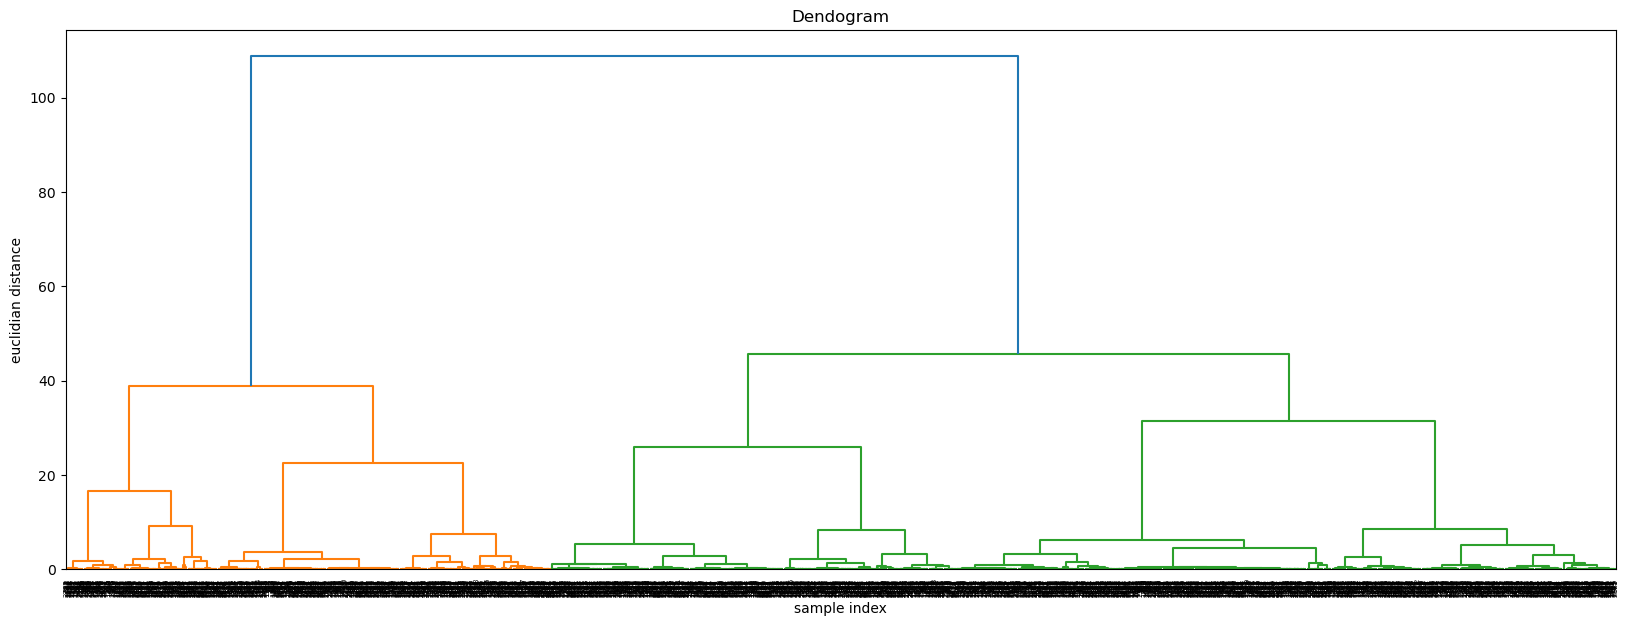

In [22]:
#---------------plotting the dendogram to find the value
plot_dendo(df_scaled_train_hm)

In [23]:
#----------setting up the labels path
y_labels_hm_path = '../../labels/scaled/scaled_hm_labels.npy'
y_labels_hm_path

'../../labels/scaled/scaled_hm_labels.npy'

0.4965759800139081


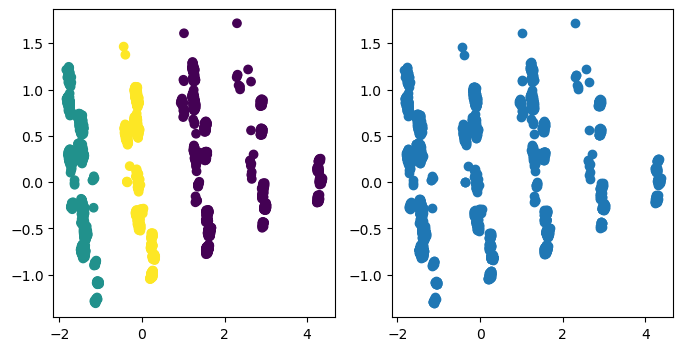

In [24]:
#-------------making the clusters on behalf of the values
hm_clusters(df_scaled_train_hm, n_clusters = 3, labels_path = y_labels_hm_path)

##### ********** Test Data ************

In [25]:
### loading the data
df_scaled_test = load_data(df_scaled_test_path)
df_scaled_test.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


In [26]:
### checking the nan values
get_nan(df_scaled_test)

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [27]:
### veryfying the shape
get_shape(df_scaled_test)

(2671, 14)

In [28]:
### finding the correlation
get_corr(df_scaled_test)

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
Source,1.000000,1.000000,-0.586767,0.100997,-0.036204,-0.040638,0.023250,-0.030094,-0.151245,0.085176,0.111308,-0.006206,0.166765,-0.420810
Destination,1.000000,1.000000,-0.586767,0.100997,-0.036204,-0.040638,0.023250,-0.030094,-0.151245,0.085176,0.111308,-0.006206,0.166765,-0.420810
Total_Stops,-0.586767,-0.586767,1.000000,-0.267581,0.195723,-0.211352,0.006695,-0.017088,0.022821,-0.103012,0.007892,0.032748,-0.119910,0.736601
Airline_IndiGo,0.100997,0.100997,-0.267581,1.000000,-0.345862,-0.324588,-0.240003,0.009340,-0.044828,-0.029029,-0.028656,-0.022180,0.026999,-0.324416
Airline_Jet Airways,-0.036204,-0.036204,0.195723,-0.345862,1.000000,-0.474535,0.504145,-0.008776,0.011203,0.134777,-0.010494,-0.009336,-0.059965,0.284718
Airline_other,-0.040638,-0.040638,-0.211352,-0.324588,-0.474535,1.000000,-0.137213,0.014464,0.051057,-0.066131,0.040340,-0.013662,-0.024725,-0.245360
Additional_Info_Some info,0.023250,0.023250,0.006695,-0.240003,0.504145,-0.137213,1.000000,0.028450,0.023572,0.075563,-0.001395,-0.032577,-0.028629,0.099735
Date_of_Journey_day,-0.030094,-0.030094,-0.017088,0.009340,-0.008776,0.014464,0.028450,1.000000,-0.023324,-0.023386,-0.010510,0.019613,-0.003485,-0.025508
Date_of_Journey_month,-0.151245,-0.151245,0.022821,-0.044828,0.011203,0.051057,0.023572,-0.023324,1.000000,0.015798,-0.109383,-0.000679,-0.148013,-0.016176
Dep_Time_hour,0.085176,0.085176,-0.103012,-0.029029,0.134777,-0.066131,0.075563,-0.023386,0.015798,1.000000,-0.034524,0.000147,0.066751,-0.019688


In [29]:
### making the copy and finding out the pca explained variance ratio
df_scaled_test_copy = df_scaled_test.copy()
df_scaled_test_copy.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


In [30]:
### finding out the variance explained ratio by df_scaled_test_copy
pca_and_variance(df_scaled_test_copy)

array([0.60354153, 0.10193231, 0.05896436, 0.05734767, 0.03603959,
       0.02815421, 0.02442994, 0.02338659, 0.02134125, 0.01860374,
       0.01364909, 0.00840786, 0.00420187, 0.        ])

In [31]:
### reducing the dimensionality of the df_scaled_test data
df_scaled_test = reduce_dim(df_scaled_test)
df_scaled_test

array([[-1.43083118,  0.34386814],
       [-0.01795358, -0.2196466 ],
       [-1.46121847,  0.70763697],
       ...,
       [-1.3756598 ,  0.39127251],
       [-1.4104317 , -0.19772705],
       [-1.42841761, -0.69361464]])

In [32]:
### veryfying the shape
get_shape(df_scaled_test)

(2671, 2)

In [33]:
### checking out the variance of the reduced data
pca_and_variance(df_scaled_test)

array([0.85551227, 0.14448773])

##### ============= K means clustering ==============

[7888.298793109351, 2804.918219385414, 1869.5575402248573, 1283.9549005860076, 1037.7689971813838, 626.2992233474904, 333.3700597602335, 232.94254865095039, 196.1868859471794, 176.25722902069077, 137.8091698264732]


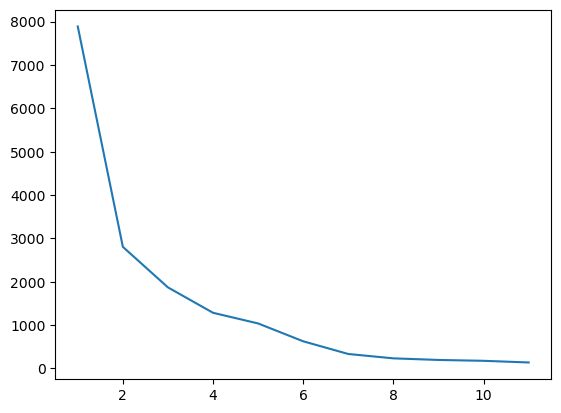

In [34]:
### finding the value of the k
find_k(df_scaled_test)

0.6483585988421918


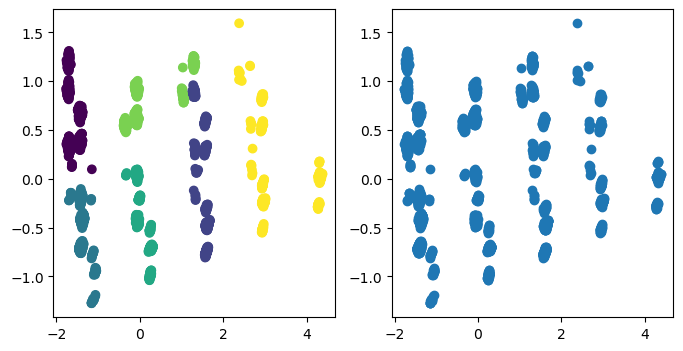

In [35]:
### taking k = 6
kmeans_clutsers(df_scaled_test, k = 6)

##### ============= DB scan clustering ==============

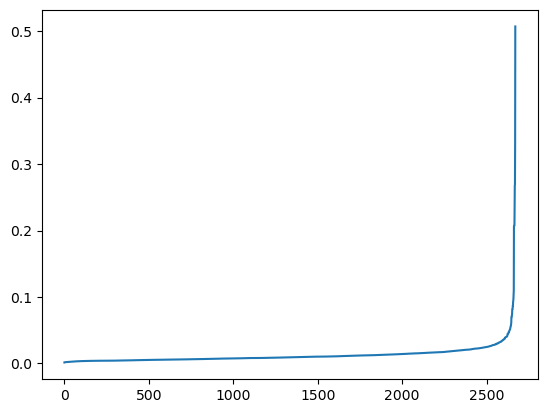

In [36]:
### finding the value of eps
find_eps(df_scaled_test)

0.7134349884324546


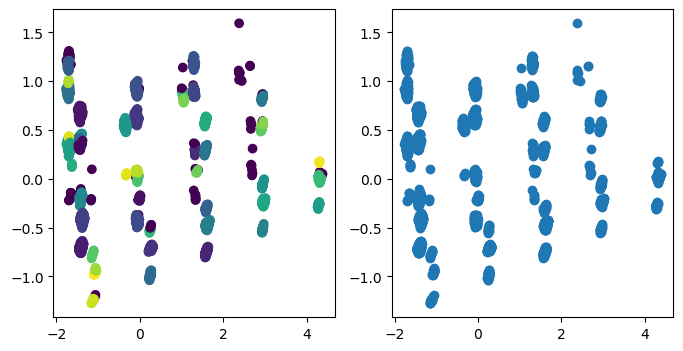

In [37]:
### taking eps = 0.025
db_clusters(df_scaled_test, eps = 0.025)

##### ============= HM clustering ================

In [38]:
### for the df_scaled_test, I will not take the sample in case of HM clustering
### because the shape of the data is already 2671 rows

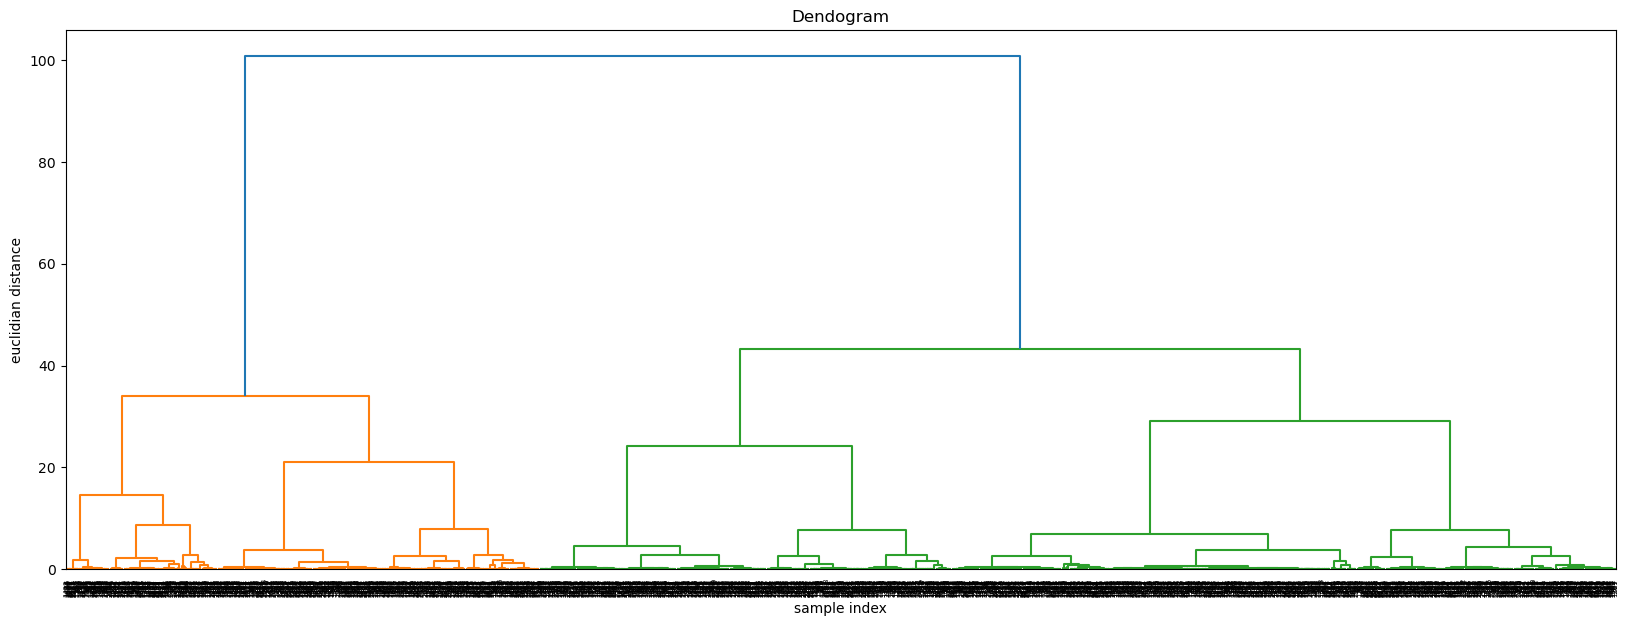

In [39]:
### plotting the dendogram
plot_dendo(df_scaled_test)

0.5065261039124452


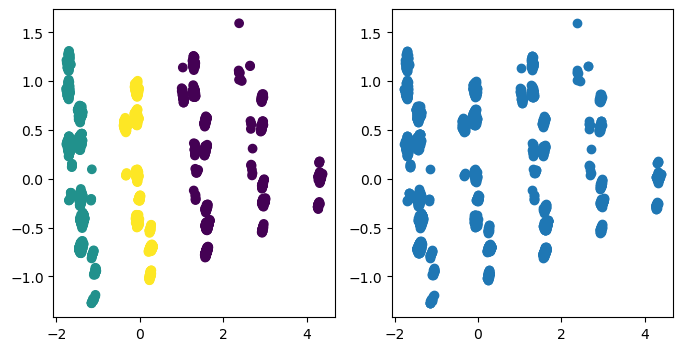

In [40]:
### taking n_clusters = 3
hm_clusters(df_scaled_test, n_clusters = 3)

##### **************Price column for the scatter plot only **************

In [41]:
### loading the price data
df_price = load_data(df_scaled_price_path)
df_price.head()

,Price
0,0.027497
1,0.075920
2,0.155917
3,0.057348
4,0.148457


In [42]:
### checking the shape only
get_shape(df_price)

(10683, 1)

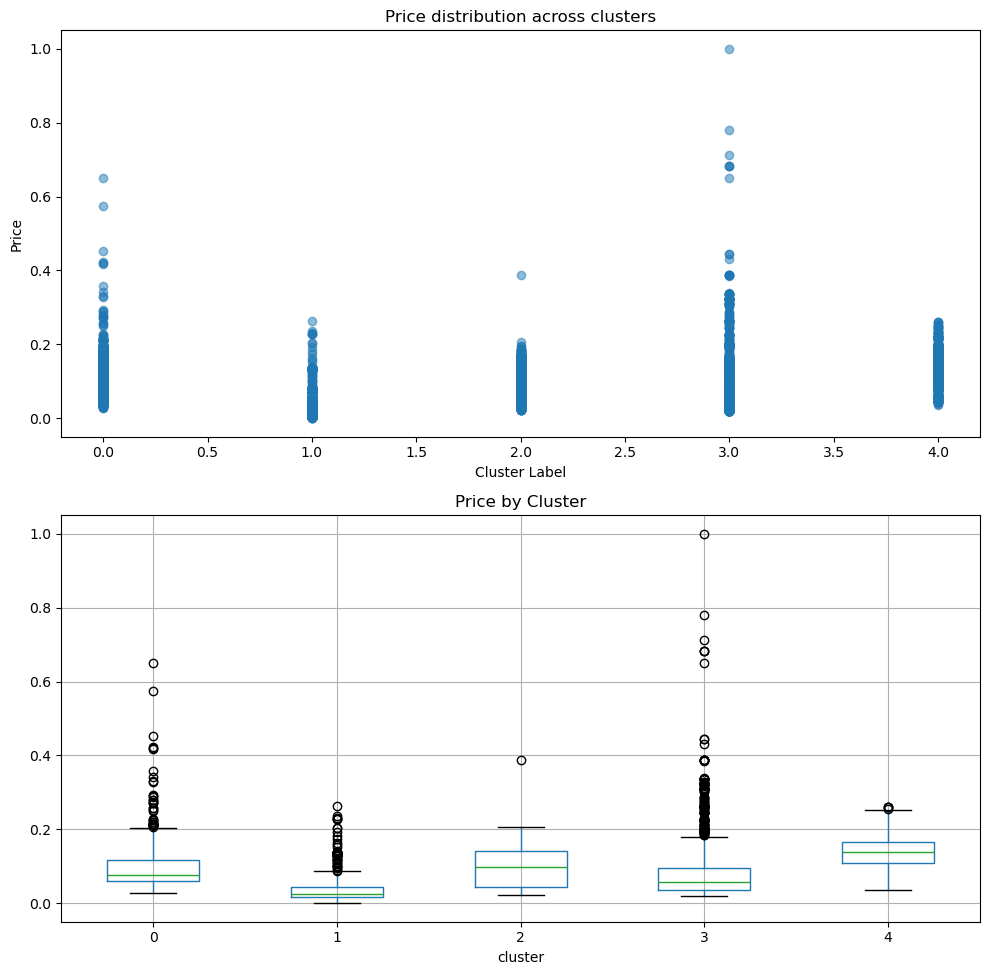

In [43]:
### plotting the scatter plot vs kmeans labels
plot_price_and_labels(df_price, labels_path = y_labels_kmeans_path)

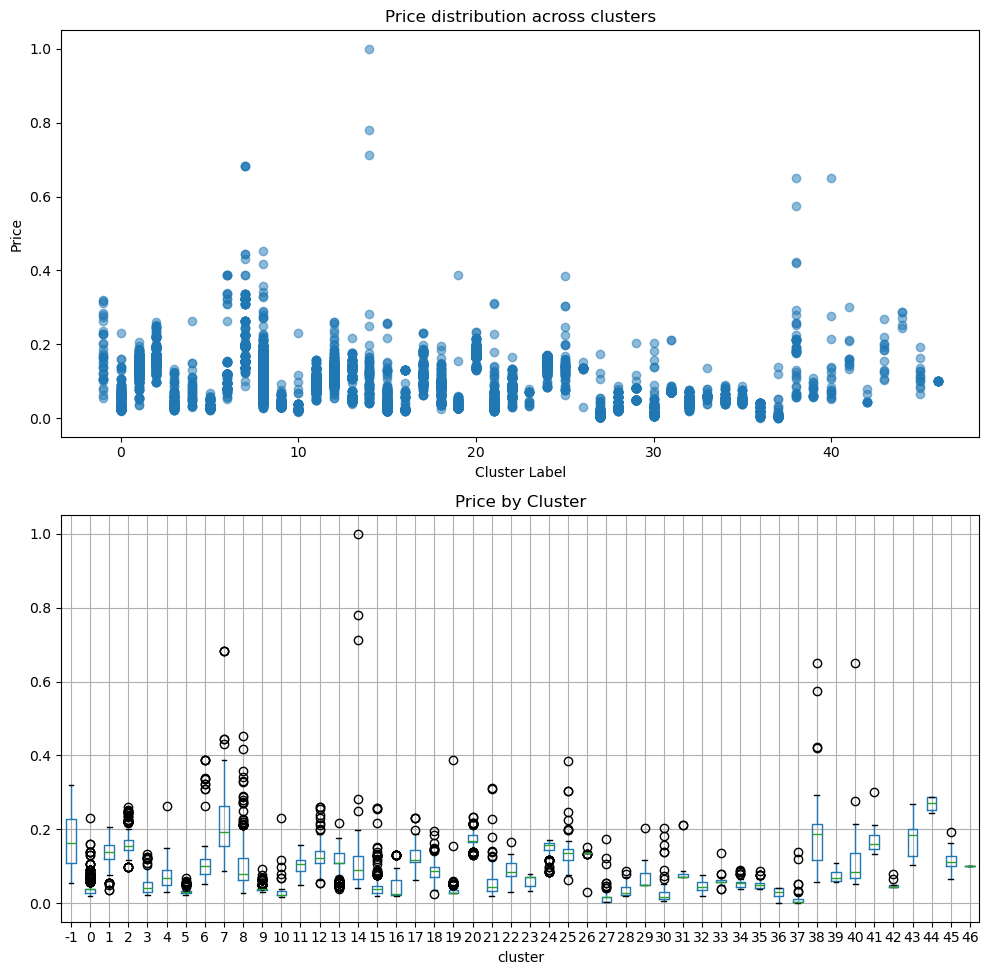

In [44]:
### plotting the scatter plot vs db labels
plot_price_and_labels(df_price, labels_path = y_labels_db_path)

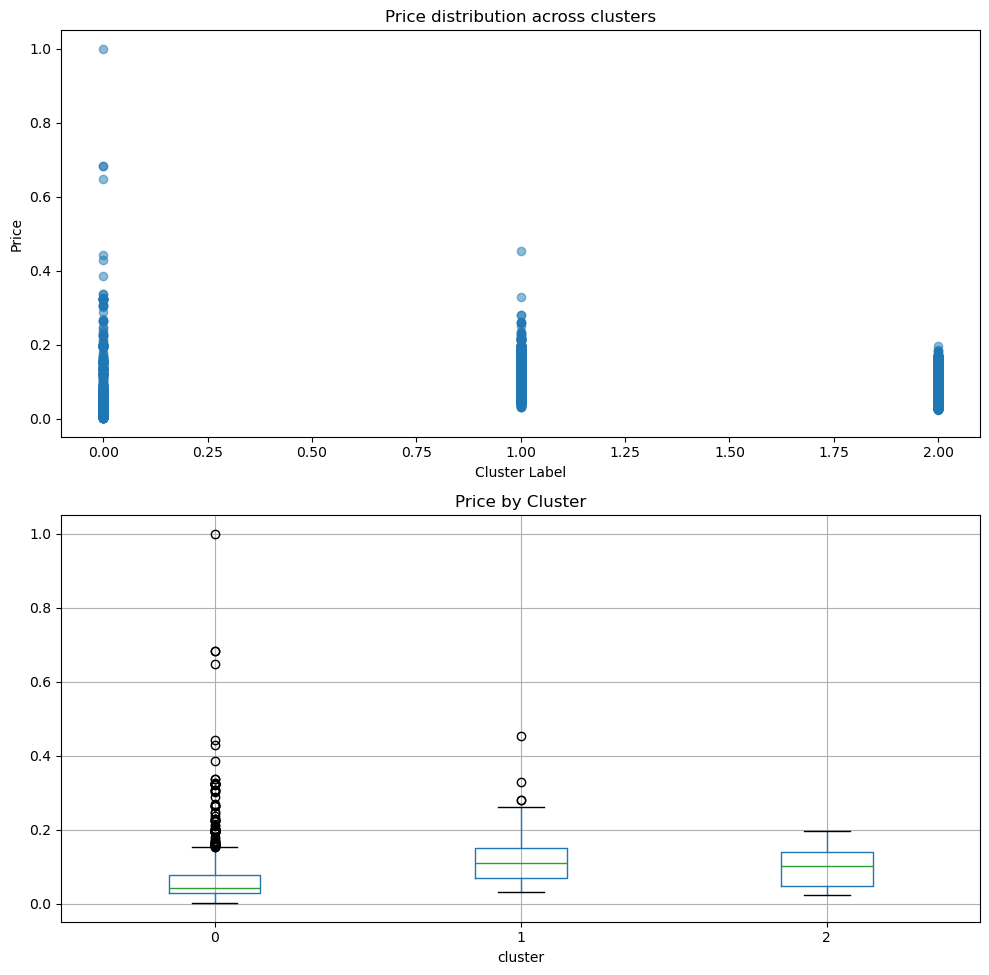

In [45]:
### plotting the scatter plot vs hm labels
### for the price vs hm cluster labels, I have to take 3000 rows just like did earlier
df_price_hm = sample_for_hm(df_price)
plot_price_and_labels(df_price_hm, labels_path = y_labels_hm_path)